In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from functions import *
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [140]:
df = pd.read_csv('../data/heart_wrangles')
df.head()

,Unnamed: 0,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [141]:
df.drop(columns='Unnamed: 0', inplace=True)


### Perform feature Seleection using LASSO

In [142]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']
x

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1
914,68,1,0,144,193,1,1,141,0,3.4,1
915,57,1,0,130,131,0,1,115,1,1.2,1
916,57,0,1,130,236,0,0,174,0,0.0,1


In [143]:
x_train, x_test, y_train,y_test = train_test_split(x,y, random_state=42, test_size=0.3)

In [144]:
y_train.shape

(642,)

In [145]:
lasso_log_reg = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)
lasso_log_reg.fit(x_train, y_train)

# Make predictions
y_pred = lasso_log_reg.predict(x_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.90      0.84       112
           1       0.93      0.83      0.87       164

    accuracy                           0.86       276
   macro avg       0.85      0.87      0.86       276
weighted avg       0.87      0.86      0.86       276



In [146]:
x.columns, lasso_log_reg.coef_[0]

(Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
        'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
       dtype='object'),
 array([ 0.03013043,  0.40248481, -0.56094478,  0.00737591, -0.00397423,
         0.3017247 , -0.05484578, -0.00814972,  0.61632548,  0.61157633,
        -0.84484435]))

In [147]:
feature_names = x.columns
coefficients = lasso_log_reg.coef_[0]
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
relevant_features = coef_df[coef_df['Coefficient'] != 0]
print("Relevant Features:\n", relevant_features)


Relevant Features:
            Feature  Coefficient
0              Age     0.030130
1              Sex     0.402485
2    ChestPainType    -0.560945
3        RestingBP     0.007376
4      Cholesterol    -0.003974
5        FastingBS     0.301725
6       RestingECG    -0.054846
7            MaxHR    -0.008150
8   ExerciseAngina     0.616325
9          Oldpeak     0.611576
10        ST_Slope    -0.844844


Relevant Features:
            Feature  Coefficient
0              Age     0.030130
1              Sex     0.402485
2    ChestPainType    -0.560945
3        RestingBP     0.007376
4      Cholesterol    -0.003974
5        FastingBS     0.301725
6       RestingECG    -0.054846
7            MaxHR    -0.008150
8   ExerciseAngina     0.616325
9          Oldpeak     0.611576
10        ST_Slope    -0.844844


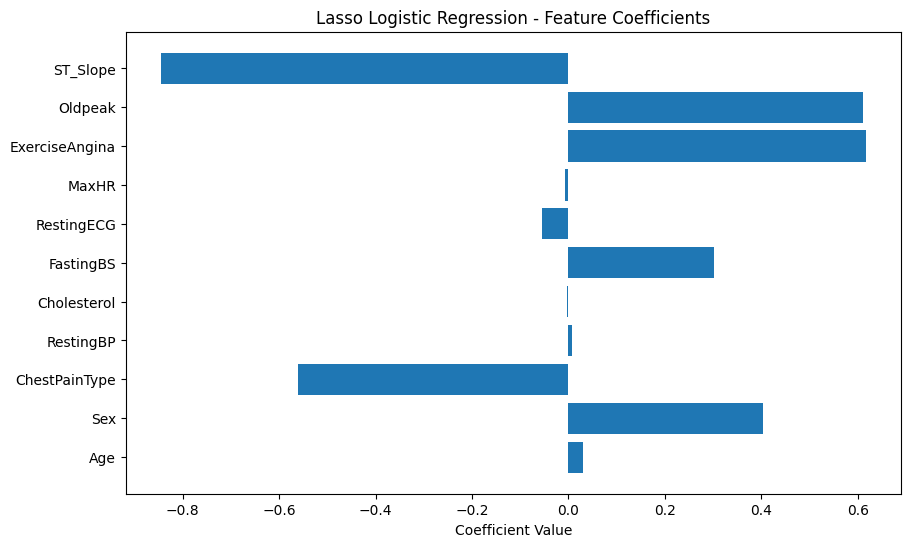

In [148]:

# Extract feature names and their corresponding coefficients
feature_names = x.columns
coefficients = lasso_log_reg.coef_[0]

# Create a DataFrame for coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Identify non-zero coefficients (relevant features)
relevant_features = coef_df[coef_df['Coefficient'] != 0]

# Display relevant features
print("Relevant Features:\n", relevant_features)

# Optionally, visualize the coefficients
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(relevant_features['Feature'], relevant_features['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Lasso Logistic Regression - Feature Coefficients')
plt.show()

### Let us also check using Feature Importance diagrams using SVC, RF and XGBoost

In [151]:
x_train_ = x_train
x_valid_ = x_test
x_train_['train_status'] = 'train' 
x_valid_['train_status'] = 'test'
df = pd.concat([x_train_,x_valid_], axis=0)

In [152]:
model = models()
logit_mod = model.models_(df = df, model = 'xgb',y_train = y_train, y_valid = y_test)

Train classificationreport:               precision    recall  f1-score   support

           0       0.84      0.88      0.86       282
           1       0.90      0.86      0.88       360

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642

Test classification_report:               precision    recall  f1-score   support

           0       0.88      0.81      0.85       122
           1       0.86      0.92      0.89       154

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.87       276
weighted avg       0.87      0.87      0.87       276



/Users/nahomworku/Desktop/ml_prod/heart/code/functions.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded.drop(columns = ['train_status'], inplace = True)
/Users/nahomworku/Desktop/ml_prod/heart/code/functions.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_encoded.drop(columns = ['train_status'], inplace = True)


In [153]:
rf = model.models_(df = df, model = 'rfc',y_train = y_train, y_valid = y_test)

Train classificationreport:               precision    recall  f1-score   support

           0       0.81      0.90      0.85       269
           1       0.92      0.85      0.88       373

    accuracy                           0.87       642
   macro avg       0.87      0.87      0.87       642
weighted avg       0.88      0.87      0.87       642

Test classification_report:               precision    recall  f1-score   support

           0       0.85      0.86      0.85       111
           1       0.90      0.90      0.90       165

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



/Users/nahomworku/Desktop/ml_prod/heart/code/functions.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded.drop(columns = ['train_status'], inplace = True)
/Users/nahomworku/Desktop/ml_prod/heart/code/functions.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_encoded.drop(columns = ['train_status'], inplace = True)


### PLOT FEATURE IMPORTANCE DIAGRAM

In [161]:
x_test

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,train_status
668,63,0,1,140,195,0,1,179,0,0.0,2,test
30,53,1,2,145,518,0,1,130,0,0.0,1,test
377,65,1,0,160,0,1,2,122,0,1.2,1,test
535,56,1,0,130,0,0,0,122,1,1.0,1,test
807,54,1,1,108,309,0,1,156,0,0.0,2,test
...,...,...,...,...,...,...,...,...,...,...,...,...
133,56,1,0,150,230,0,2,124,1,1.5,1,test
813,69,0,3,140,239,0,1,151,0,1.8,2,test
734,56,1,0,130,283,1,0,103,1,1.6,0,test
360,62,1,2,160,0,0,1,72,1,0.0,1,test


In [162]:
x_train.drop(columns='train_status', inplace=True)
x_test.drop(columns='train_status', inplace=True)


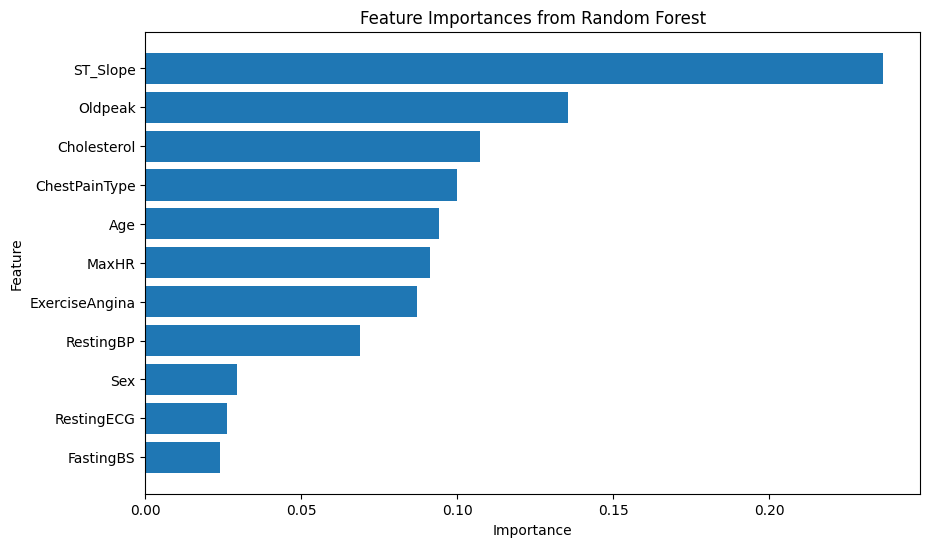

In [163]:
# Initialize and fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
feature_names = x.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [164]:
feature_importances_df

,Feature,Importance
10,ST_Slope,0.236631
9,Oldpeak,0.135450
4,Cholesterol,0.107125
2,ChestPainType,0.099983
0,Age,0.093992
7,MaxHR,0.091252
8,ExerciseAngina,0.086942
3,RestingBP,0.068911
1,Sex,0.029514
6,RestingECG,0.026277


##### Let us now try removing features from LASSO

In [165]:
x_train.drop(columns=['RestingBP','Cholesterol'], inplace=True)
x_test.drop(columns=['RestingBP','Cholesterol'], inplace=True)



### Perform feature Seleection using LASSO

In [170]:
x_train_ = x_train
x_valid_ = x_test
x_train_['train_status'] = 'train' 
x_valid_['train_status'] = 'test'
df = pd.concat([x_train_,x_valid_], axis=0)

In [184]:
rf_model = model.models_(df = df, model = 'rfc',y_train = y_train, y_valid = y_test)

Train classificationreport:               precision    recall  f1-score   support

           0       0.82      0.89      0.85       275
           1       0.91      0.85      0.88       367

    accuracy                           0.87       642
   macro avg       0.86      0.87      0.87       642
weighted avg       0.87      0.87      0.87       642

Test classification_report:               precision    recall  f1-score   support

           0       0.87      0.82      0.84       119
           1       0.87      0.90      0.88       157

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



/Users/nahomworku/Desktop/ml_prod/heart/code/functions.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded.drop(columns = ['train_status'], inplace = True)
/Users/nahomworku/Desktop/ml_prod/heart/code/functions.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_encoded.drop(columns = ['train_status'], inplace = True)


In [172]:
x_train.drop(columns='train_status', inplace=True)
x_test.drop(columns='train_status', inplace=True)


In [178]:
importances.shape, x_train.columns.shape 

((9,), (9,))

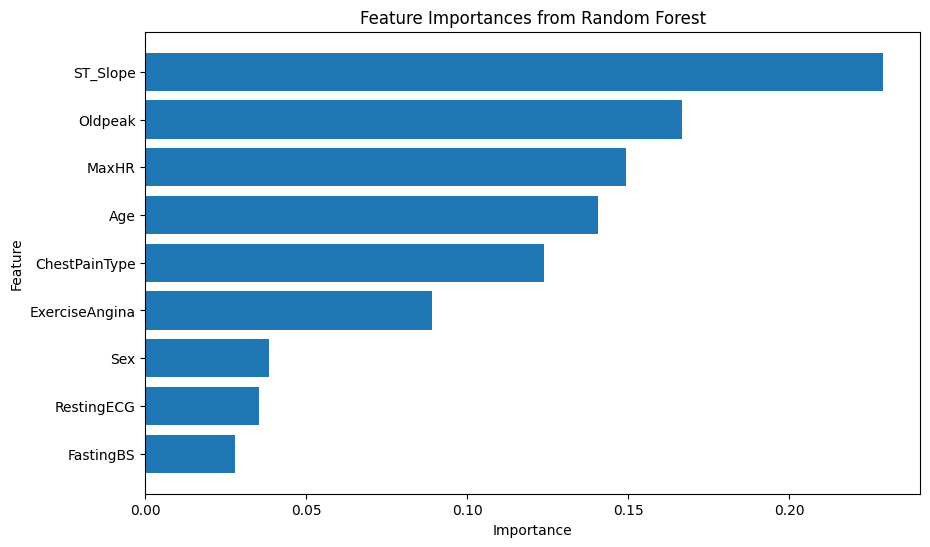

In [179]:
# Initialize and fit the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
feature_names = x_train.columns

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()

In [180]:
feature_importances_df

,Feature,Importance
8,ST_Slope,0.229246
7,Oldpeak,0.166692
5,MaxHR,0.149354
0,Age,0.140637
2,ChestPainType,0.123777
6,ExerciseAngina,0.089082
1,Sex,0.038238
4,RestingECG,0.035246
3,FastingBS,0.027729


In [181]:
feature_importances_df_sum = feature_importances_df.loc[feature_importances_df['Importance'] > 0.04]
feature_importances_df_sum

,Feature,Importance
8,ST_Slope,0.229246
7,Oldpeak,0.166692
5,MaxHR,0.149354
0,Age,0.140637
2,ChestPainType,0.123777
6,ExerciseAngina,0.089082


In [183]:
feature_importances_df_sum['Importance'].sum()

0.8987876720202459

##### We see here that almost 90% of the explainablity lies with in the first six features. We can use top 6 features to build an app for prediction.

In [189]:
df = pd.read_csv('../data/heart_wrangles')
df.drop(columns=['Unnamed: 0','Cholesterol','RestingBP'], inplace=True)

,Age,Sex,ChestPainType,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,0,1,172,0,0.0,2,0
1,49,0,2,0,1,156,0,1.0,1,1
2,37,1,1,0,2,98,0,0.0,2,0
3,48,0,0,0,1,108,1,1.5,1,1
4,54,1,2,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,0,1,132,0,1.2,1,1
914,68,1,0,1,1,141,0,3.4,1,1
915,57,1,0,0,1,115,1,1.2,1,1
916,57,0,1,0,0,174,0,0.0,1,1


In [190]:
df.to_csv("../data/data_reduced")